In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import sys
sys.path.append('../')
from scint_tools import scint_utils

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16})

savefigs = False

In [8]:
PATH = "/home/jishnu/PIE_DATA/"
h5_file = "20240304-055751.hdf5"

mydata = scint_utils.scintdata(PATH+h5_file)
mydata.RFIsub()
mydata.plot_wfall(save=savefigs, show=False)

Data loaded ..
RFI subtracted ..


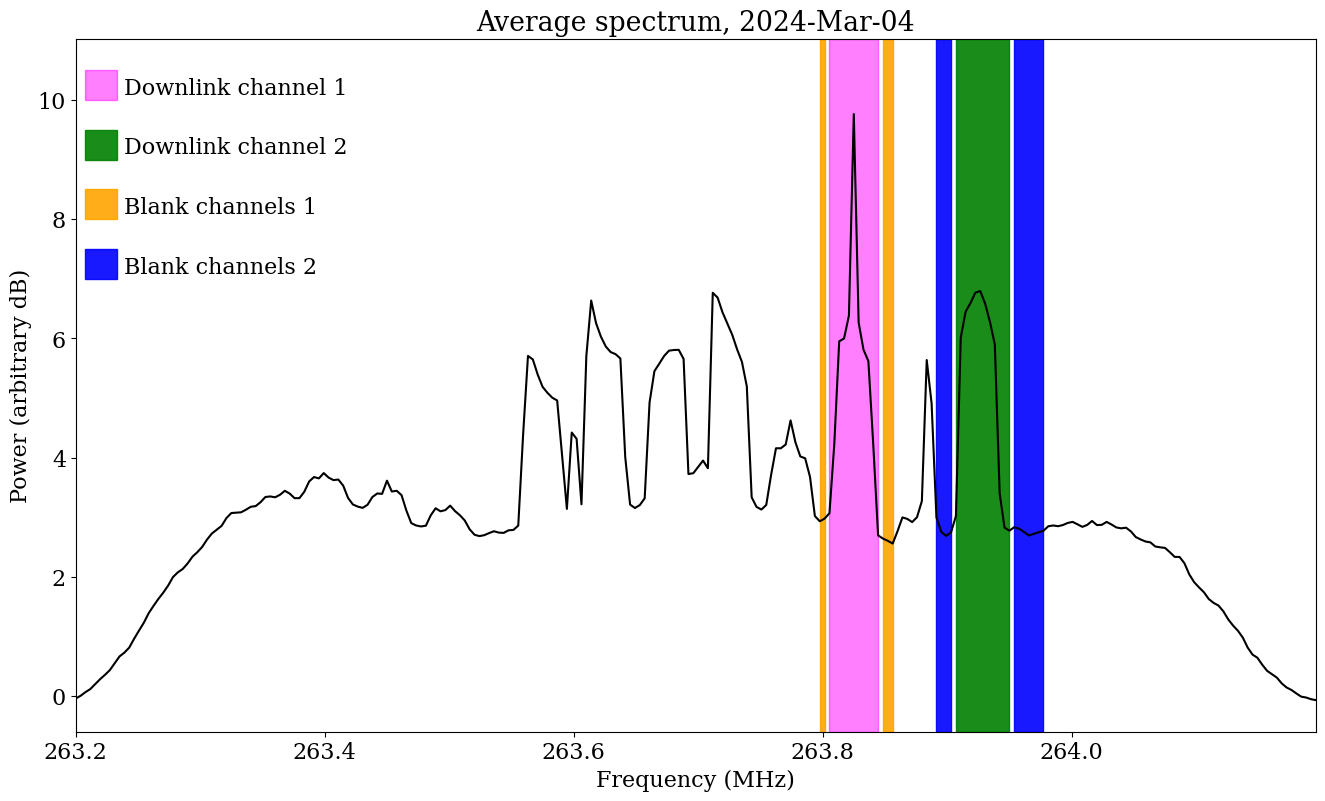

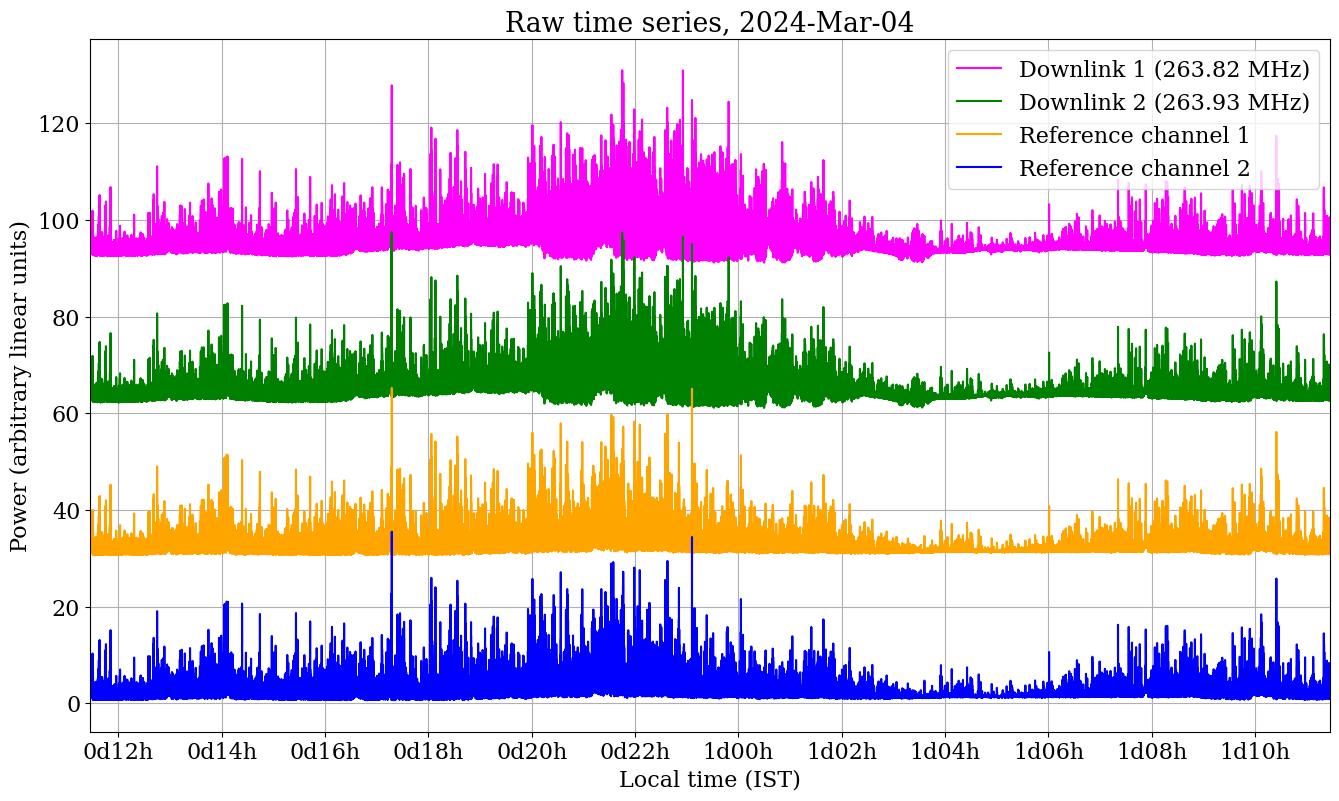

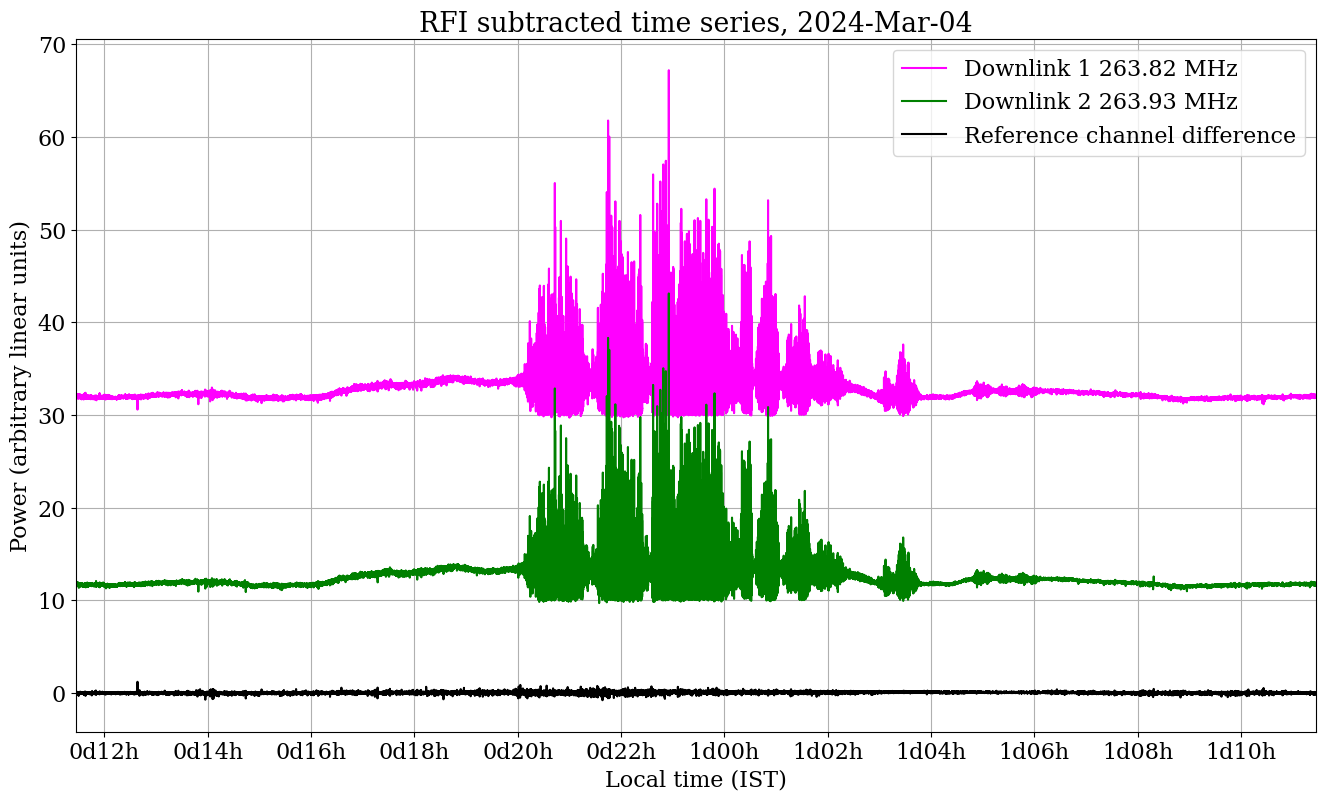

In [9]:
first_hr = int(mydata.hrs_full[0])+1
last_hr = int(mydata.hrs_full[-1])+1
xticks = np.arange(first_hr,last_hr, 2)
xlabels = [(str(int(xtick/24))+"d"+str(xtick%24).zfill(2)+"h") for xtick in xticks]

fig, ax1 = plt.subplots(1,1, figsize=(16,9))

ax1.set_title("Average spectrum, "+mydata.obs_date)
ax1.plot(mydata.freq, 10*np.log10(np.mean(mydata.radio_data[0:500], axis=0)), color='black')

ax1.axvspan(mydata.freq[min(mydata.satdlink_chans_1)], mydata.freq[max(mydata.satdlink_chans_1)], color='magenta', alpha=0.5)
ax1.axvspan(mydata.freq[min(mydata.satdlink_chans_2)], mydata.freq[max(mydata.satdlink_chans_2)], color='green', alpha=0.9)

ax1.axvspan(mydata.freq[min(mydata.ref_chans_1_a)], mydata.freq[max(mydata.ref_chans_1_a)], color='orange', alpha=0.9)
ax1.axvspan(mydata.freq[min(mydata.ref_chans_1_b)], mydata.freq[max(mydata.ref_chans_1_b)], color='orange', alpha=0.9)

ax1.axvspan(mydata.freq[min(mydata.ref_chans_2_a)], mydata.freq[max(mydata.ref_chans_2_a)], color='blue', alpha=0.9)
ax1.axvspan(mydata.freq[min(mydata.ref_chans_2_b)], mydata.freq[max(mydata.ref_chans_2_b)], color='blue', alpha=0.9)

rect1 = matplotlib.patches.Rectangle((mydata.freq[2],10), 0.025,0.5, color='magenta', alpha=0.5)
rect2 = matplotlib.patches.Rectangle((mydata.freq[2],9), 0.025,0.5, color='green', alpha=0.9)
rect3 = matplotlib.patches.Rectangle((mydata.freq[2],8), 0.025,0.5, color='orange', alpha=0.9)
rect4 = matplotlib.patches.Rectangle((mydata.freq[2],7), 0.025,0.5, color='blue', alpha=0.9)

ax1.add_patch(rect1)
ax1.add_patch(rect2)
ax1.add_patch(rect3)
ax1.add_patch(rect4)
ax1.text(mydata.freq[10],10.1, "Downlink channel 1")
ax1.text(mydata.freq[10],9.1, "Downlink channel 2")
ax1.text(mydata.freq[10],8.1, "Blank channels 1")
ax1.text(mydata.freq[10],7.1, "Blank channels 2")

ax1.set_xlim(min(mydata.freq), max(mydata.freq))
ax1.set_xlabel("Frequency (MHz)")
ax1.set_ylabel("Power (arbitrary dB)")
if savefigs:
    fig.savefig(mydata.obs_date+"_avspec.pdf", dpi=300, bbox_inches='tight')

fig,  ax2 = plt.subplots(1,1, figsize=(16,9))
ax2.set_title("Raw time series, "+mydata.obs_date)
ax2.plot(mydata.hrs_full, mydata.satdlink_raw_pow_c1+90, label="Downlink 1 ({:.2f} MHz)".format(mydata.freq_1), color='magenta')
ax2.plot(mydata.hrs_full, mydata.satdlink_raw_pow_c2+60, label="Downlink 2 ({:.2f} MHz)".format(mydata.freq_2), color='green')
ax2.plot(mydata.hrs_full, mydata.ref_pow_1+30, label="Reference channel 1", color='orange')
ax2.plot(mydata.hrs_full, mydata.ref_pow_2, label="Reference channel 2", color='blue')
ax2.set_xticks(xticks, labels=xlabels)
ax2.set_xlim(min(mydata.hrs_full), max(mydata.hrs_full))
ax2.grid()
ax2.set_xlabel("Local time (IST)")
ax2.set_ylabel("Power (arbitrary linear units)")
ax2.legend(loc='best')
if savefigs:
    fig.savefig(mydata.obs_date+"_raw_power.pdf", dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(1,1, figsize=(16,9))
ax.set_title("RFI subtracted time series, "+mydata.obs_date)
ax.plot(mydata.hrs_full, mydata.satdlink_proc_pow_c1+30, label="Downlink 1 {:.2f} MHz".format(mydata.freq_1), color='magenta')
ax.plot(mydata.hrs_full, mydata.satdlink_proc_pow_c2+10, label="Downlink 2 {:.2f} MHz".format(mydata.freq_2), color='green')
ax.plot(mydata.hrs_full, (mydata.ref_pow_1-mydata.ref_pow_2), label="Reference channel difference", color='black') 
ax.legend(loc='best')
ax.set_xticks(xticks, labels=xlabels)
ax.set_xlim(min(mydata.hrs_full), max(mydata.hrs_full))
ax.grid()
ax.set_xlabel("Local time (IST)")
ax.set_ylabel("Power (arbitrary linear units)")
ax.legend(loc='best')
if savefigs:
    fig.savefig(mydata.obs_date+"_scint_power.pdf", dpi=300, bbox_inches='tight')

Calculating Periodogram for channel a
Calculating S4 for freq : 263.82 MHz
slope= -3.1000758739340384
7
493.1742828023625


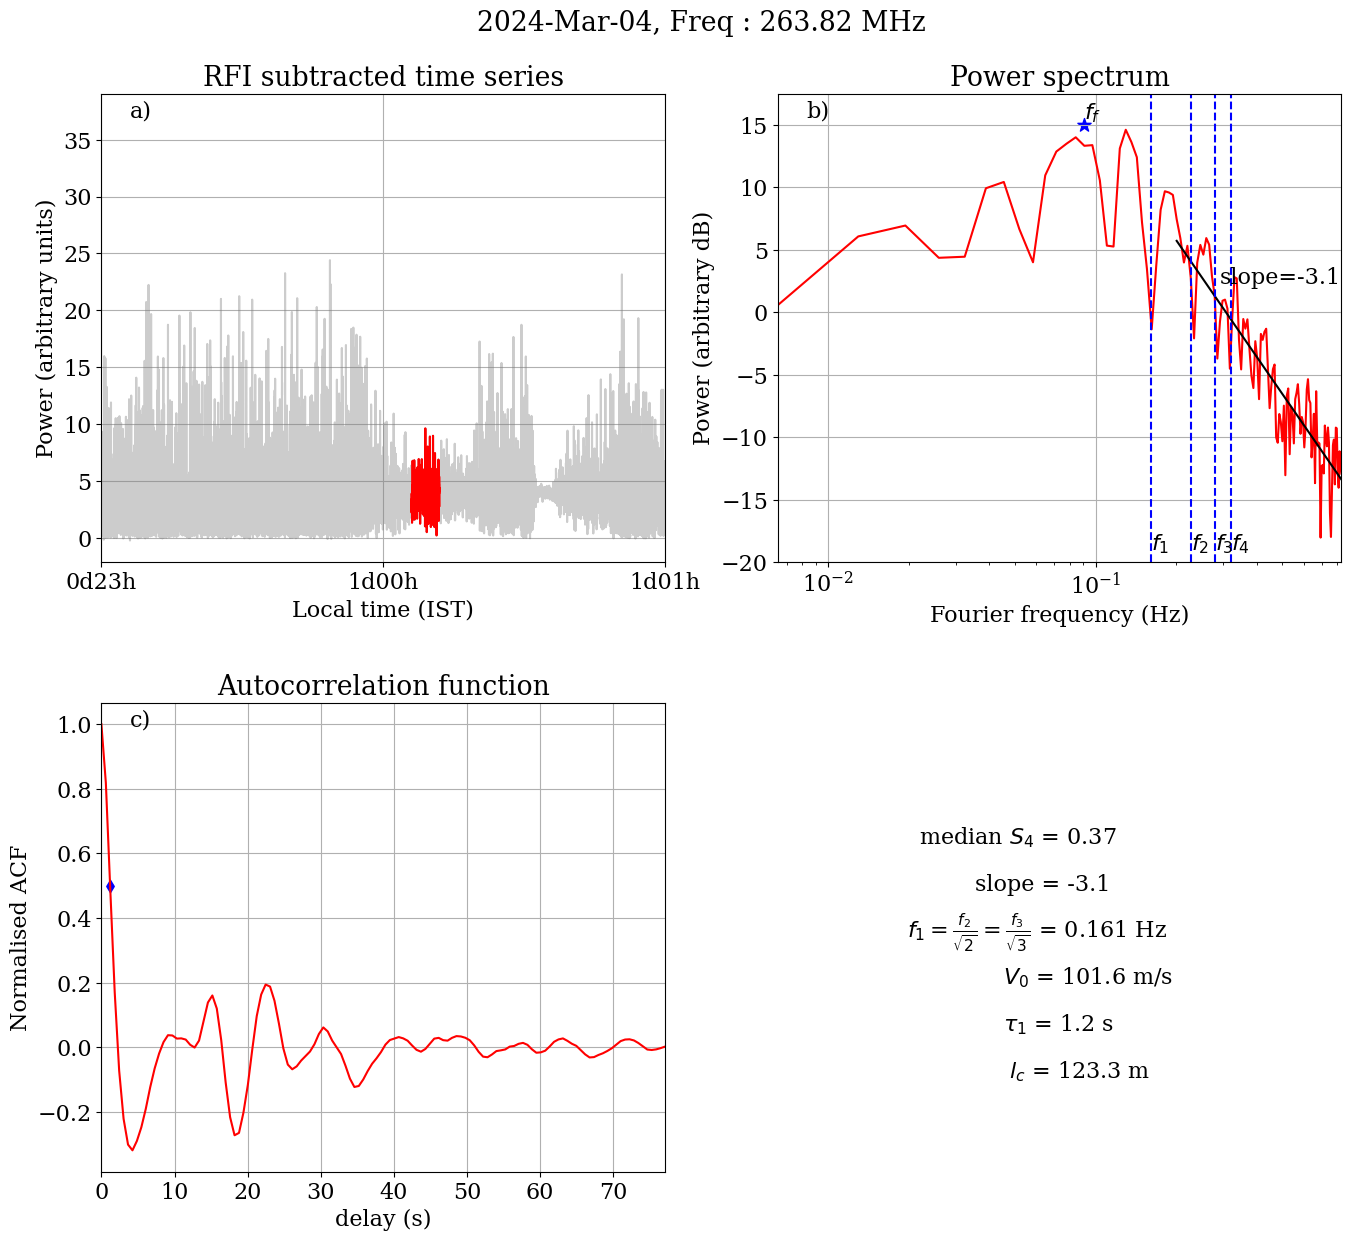

In [10]:
Nperseg = 256
t_start = 24.1
t_end = t_start+0.1
f_fresnel = 0.161

# t_start = 25.5
# t_end = t_start+0.1
# f_fresnel = 0.17

powspec_indices = mydata.get_indices(hr_low=t_start, hr_high=t_end)

f, mean_Pxx, f_psd, pval, pfit_c = mydata.calc_welch_fit(powspec_indices, Nperseg=Nperseg, NFT=Nperseg, f_break_low=0.2, f_break_high=1,
                                                         detrend='linear', window='hann')
s4_values = mydata.calc_s4(powspec_indices)

print ("slope=",pfit_c[0])

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(16,14))
fig.suptitle(mydata.obs_date+", Freq : {:.2f} MHz".format(mydata.freq_1), y=0.94)

ax1.set_title("RFI subtracted time series")
ax1.plot(mydata.hrs_full, mydata.satdlink_proc_pow_c1, color='grey', alpha=0.4)
ax1.plot(mydata.hrs_full[powspec_indices], mydata.satdlink_proc_pow_c1[powspec_indices], color='red')
ax1.set_xlabel("Local time (IST)")
ax1.set_ylabel("Power (arbitrary units)")

first_hr = int(mydata.hrs_full[0])+1
last_hr = int(mydata.hrs_full[-1])+1
xticks = np.arange(first_hr,last_hr, 1)
xlabels = [(str(int(xtick/24))+"d"+str(xtick%24).zfill(2)+"h") for xtick in xticks]
ax1.set_xticks(xticks, labels=xlabels)
ax1.set_xlim(int(t_start-1),int(t_start+1))
ax1.grid()
ax1.text(0.05, 0.95, 'a)',transform=ax1.transAxes)

ax2.set_title("Power spectrum")
ax2.semilogx(f[1:], 10*np.log10(mean_Pxx[1:]), color='red', label="data")
ax2.semilogx(f_psd, 10*np.log10(pval), color='black', label="fit")
ax2.annotate("slope={:.1f}".format(pfit_c[0]), xy = (f_psd[14], 10*np.log10(pval)[9]))
ax2.set_xlabel("Fourier frequency (Hz)")
ax2.set_ylabel("Power (arbitrary dB)")
ax2.set_xlim(min(f[1:]), max(f[1:]))

ax2.axvline(f_fresnel, ls='--', color='blue')
ax2.text(f_fresnel, -19, r"$f_1$")
ax2.axvline(f_fresnel*np.sqrt(2), ls='--', color='blue')
ax2.text(f_fresnel*np.sqrt(2), -19, r"$f_2$")
ax2.axvline(f_fresnel*np.sqrt(3), ls='--', color='blue')
ax2.text(f_fresnel*np.sqrt(3), -19, r"$f_3$")
ax2.axvline(f_fresnel*np.sqrt(4), ls='--', color='blue')
ax2.text(f_fresnel*np.sqrt(4), -19, r"$f_4$")
ax2.grid()
ax2.text(0.05, 0.95, 'b)',transform=ax2.transAxes)

ax3.set_title("Autocorrelation function")
acf = np.fft.irfft(mean_Pxx)
acf = acf/np.max(acf)
acf = acf[0:int(len(acf)/2)]
tau = np.linspace(0, 0.5, len(acf))*(1/(f[1]-f[0]))
tau_min_index = np.where(acf<0.5)[0][0]

ax3.plot(tau, acf, color='red')
ax3.set_xlim(0, max(tau))
ax3.set_xlabel(r"delay (s)")
ax3.set_ylabel("Normalised ACF")
ax3.grid()
ax3.scatter(tau[tau_min_index], 0.5, s=40, marker="d", color='blue')
ax3.text(0.05, 0.95, 'c)',transform=ax3.transAxes)

z = 350e3
wl = 300/mydata.freq_1
V_0 = f_fresnel*np.sqrt(wl*z)
f_fresnel_peak = V_0/np.sqrt(np.pi*wl*z)
l_charac = V_0*tau[tau_min_index]

print (np.where(np.isclose(acf, np.min(acf)))[0][0])
print (tau[8]*V_0)

ax2.scatter(f_fresnel_peak, 15, s=100, marker="*", color='blue')
ax2.text(f_fresnel_peak, 15.5, r"$f_f$")
ax2.set_ylim(-20, 17.5)

ax4.axis('off')
ax4.text(0.25, 0.7, r"median $S_4$ = {:.2f}".format(np.median(s4_values)))
ax4.text(0.35, 0.6, r"slope = {:.1f}".format(pfit_c[0]))
ax4.text(0.23, 0.5, r"$f_1 = \frac{f_2}{\sqrt{2}} = \frac{f_3}{\sqrt{3}}$ = "+str(f_fresnel)+" Hz")# {:.3f} .format(f_fresnel)
ax4.text(0.4, 0.4, r"$V_0$ = {:.1f} m/s".format(V_0))
ax4.text(0.4, 0.3, r"$\tau_1$ = {:.1f} s".format(tau[tau_min_index]))
ax4.text(0.41, 0.2, r"$l_c$ = {:.1f} m".format(l_charac))

fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.3)

if savefigs:
    fig.savefig(mydata.obs_date+"_scint_FFT_"+str(int(t_start))+".pdf", dpi=300, bbox_inches='tight')

